<b>¡Hola Camila!</b>

Soy Alejandro Abia, y estaré revisando tu proyecto.

Mis comentarios estarán en celdas de colores: verde, amarillo y rojo, como un semáforo. Por favor, <b>no las borres ni cambies de lugar</b> mientras dure la revisión.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>
En celdas verdes encontrarás comentarios sobre tus aciertos y fortalezas.
</div>
<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>
El color amarillo lo usaré para señalar aspectos importantes o sugerencias de mejora.
</div>
<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>
En rojo señalaré puntos que podrían afectar el correcto funcionamiento del proyecto. No son errores, sino oportunidades de mejora.
</div>
<div class="alert alert-block alert-info">
<b>Comentario estudiante</b><a class="tocSkip"></a>
Si deseas dejarme un comentario durante la revisión, utiliza celdas azules como esta.
</div>
Tu proyecto se considerará aprobado cuando las observaciones en rojo sean atendidas.
¡Empecemos!


In [1]:
import pandas as pd 
import math as mt 
import numpy as np 
from scipy import stats as st 
from math import factorial 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

<div class="alert alert-block alert-success">
<b>Celda [1]</b> <a class="tocSkip"></a><br>
Has comenzado muy bien al importar todas las bibliotecas necesarias para el análisis. Esto garantiza que tengas todas las herramientas a tu disposición desde el inicio.
</div>


In [2]:
#Traemos los datasets
hypotheses=pd.read_csv('/datasets/hypotheses_us.csv', sep=';')
orders=pd.read_csv('/datasets/orders_us.csv')
visits=pd.read_csv('/datasets/visits_us.csv')

#Consultamos la información inicial de cada uno de ellos
hypotheses.info()
print()
orders.info()
print()
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (to

<div class="alert alert-block alert-success">
<b>Celda [2]</b> <a class="tocSkip"></a><br>
Buena práctica al verificar la información inicial de los datasets. Esto te proporciona una comprensión clara de la estructura y el contenido de los datos desde el principio.
</div>


Se puede evidenciar que el DF hypotheses contiene múltiples valores separados por punto y coma y están todos en una sola columna, por lo tando se debe separar  en múltiples columnas usando el parámetro sep=';' al leer el archivo, por lo que se hará en el punto anterior y se correrá nuevamente el archivo para verificar que haya quedado correctamente ajustado. 

### Procesamiento de datos

Adicionalmente, los data frames orders y visits contienen datos de fechas que están en formato object, por lo tanto los convertiremos a tipo datetime.

A continuación, realizaremos todos esos cambiamos para limpiar la data y revisaremos que no tengamos valores duplicados o nulos.

In [3]:
# Convertimos columna date a tipo feecha
orders['date'] = pd.to_datetime(orders['date'])

# Verificamos duplicados
print(f'Duplicados en orders: {orders.duplicated().sum()}')

# Verificamos que los datos hayan quedado correctamente procesados.
print(orders.dtypes)
print()

#Consultamos la información del DF para tener contexto.
orders.head()

Duplicados en orders: 0
transactionId             int64
visitorId                 int64
date             datetime64[ns]
revenue                 float64
group                    object
dtype: object



,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<div class="alert alert-block alert-success">
<b>Celda [3]</b> <a class="tocSkip"></a><br>
Has hecho un buen uso de las funciones estadísticas para obtener una visión inicial del conjunto de datos. Este análisis preliminar es esencial para comprender el contexto de los datos rápidamente.
</div>


In [4]:
# Convertimos columna date a tipo feecha
visits['date'] = pd.to_datetime(visits['date'])

# Verificamos duplicados
print(f'Duplicados en orders: {visits.duplicated().sum()}')

# Verificamos que los datos hayan quedado correctamente procesados.
print(visits.dtypes)
print()

#Consultamos la información del DF para tener contexto.
visits.head()

Duplicados en orders: 0
date      datetime64[ns]
group             object
visits             int64
dtype: object



,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<div class="alert alert-block alert-warning">
<b>Celda [4]</b> <a class="tocSkip"></a><br>
Aunque verificaste duplicados en el dataset de visitas, sería beneficioso hacer lo mismo con el dataset de hipótesis para asegurar la integridad de todos los datos. 
</div>


In [5]:
#Verificamos valores nulos

print('Valores nulos en orders:\n', orders.isnull().sum())
print('\nValores nulos en visits:\n', visits.isnull().sum())

Valores nulos en orders:
 transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

Valores nulos en visits:
 date      0
group     0
visits    0
dtype: int64


<div class="alert alert-block alert-success">
<b>Celda [5]</b> <a class="tocSkip"></a><br>
Es positivo que hayas verificado los valores nulos. 
</div>


## Parte 1. Priorizar hipótesis

#### Framework ICE

In [6]:
#Creamos una nueva columna para determinar el farctor ICE
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
ice_sorted = hypotheses.sort_values(by='ICE', ascending=False).reset_index(drop=True)

<div class="alert alert-block alert-success">
<b>Celda [6]</b> <a class="tocSkip"></a><br>
La creación de una columna para el factor ICE es una excelente manera de priorizar hipótesis. Esto facilita una evaluación más objetiva de las oportunidades.
</div>


#### Framework RICE

In [7]:
#Creamos una columna nueva para determinar el factor RICE
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
rice_sorted = hypotheses.sort_values(by='RICE', ascending=False).reset_index(drop=True)

<div class="alert alert-block alert-success">
<b>Celda [7]</b> <a class="tocSkip"></a><br>
Buena implementación del factor RICE, que añade la dimensión de alcance a la priorización de hipótesis. Esto proporciona una perspectiva más completa.
</div>


#### Comparación ICE vs. RICE

In [8]:
ice_rank = ice_sorted[['Hypothesis']].copy()
ice_rank['ICE Rank'] = ice_rank.index + 1

rice_rank = rice_sorted[['Hypothesis']].copy()
rice_rank['RICE Rank'] = rice_rank.index + 1

comparison = pd.merge(ice_rank, rice_rank, on='Hypothesis')
comparison['Rank Change'] = comparison['ICE Rank'] - comparison['RICE Rank']
comparison.head(10)

,Hypothesis,ICE Rank,RICE Rank,Rank Change
0,Launch a promotion that gives users discounts ...,1,5,-4
1,Add two new channels for attracting traffic. T...,2,3,-1
2,Add a subscription form to all the main pages....,3,1,2
3,Show banners with current offers and sales on ...,4,4,0
4,Add product recommendation blocks to the store...,5,2,3
5,Launch your own delivery service. This will sh...,6,7,-1
6,Add a customer review page. This will increase...,7,8,-1
7,Change the category structure. This will incre...,8,6,2
8,Change the background color on the main page. ...,9,9,0


## Conclusiones

El factor ICE evalúa el valor potencial de una idea con base en su impacto, certeza y costo de implementación, mientras que el factor RICE toma en cuenta el "alcance" de la idea, es decir, cuántos usuarios podrían verse afectados.

Teniendo en cuenta esta información podemos decir que la priorización cambió en algunos casos, y esto tiene sentido porque:

1. RICE da más peso a hipótesis con alto "Reach". Una hipótesis que afecta a más usuarios (aunque su impacto individual sea moderado) puede tener mayor valor total.

2. Algunas hipótesis que parecían más prioritarias según ICE bajaron de lugar con RICE si su alcance era bajo.

3. Otras que no se destacaban con ICE subieron en RICE gracias a su alto "Reach".

## Parte 2. Análisis del test A/B

### 1. Ingreso acumulado por grupo

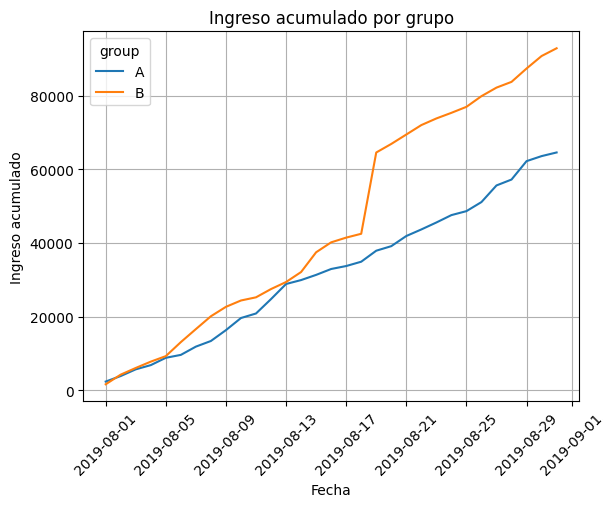

In [9]:
#Calculamos el ingreso acumulado
cumulative_revenue = orders.groupby(['date', 'group'])['revenue'].sum().groupby(level=1).cumsum().reset_index()

#Grafiamos
sns.lineplot(data=cumulative_revenue, x='date', y='revenue', hue='group')
plt.title('Ingreso acumulado por grupo')
plt.ylabel('Ingreso acumulado')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
<b>Celda [9]</b> <a class="tocSkip"></a><br>
El gráfico de ingresos acumulados es informativo, pero podrías considerar incluir una línea de tendencia o anotaciones para resaltar puntos clave en el tiempo. Esto ayudaría a destacar patrones o eventos significativos.
</div>


#### Referente al ingreso acumulado por grupo, se presentan las siguientes observaciones: 

Crecimiento inicial similar:
* Durante la primera mitad del experimiente (Aproximadamente hasta el 15 de agosto) ambos grupos mostraron un crecimiento del ingreso bastante similar.
   
Despegue del grupo B:
* Apartir del 17 de agosto, el grupo B muestra un salto fuerte en ingresos acumulados, superando al grupo A y manteniendo esa ventaja hasta el final del experimento.
* El grupo A tiene un crecimiento más constante.
* El grupo B termina con mayor ingreso total acumulado.

### 2. Tamaño de pedido promedio acumulado por grupo

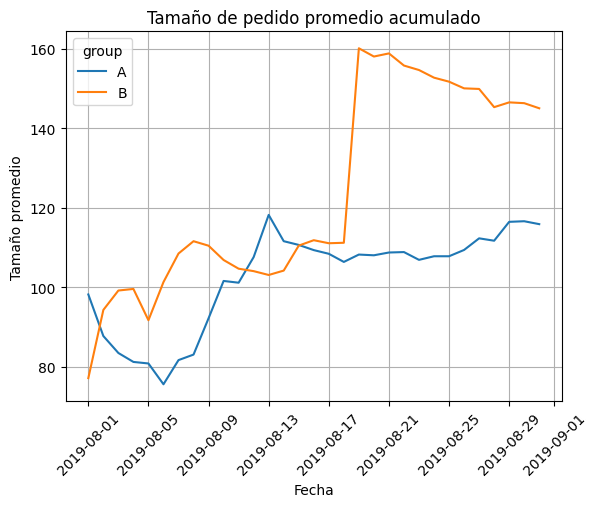

In [10]:
#Calculamos el tamaño de pedido promedio acumulado por grupo
cumulative_avg_order = orders.groupby(['date', 'group'])['revenue'].agg(['sum', 'count']).reset_index()
cumulative_avg_order['cum_sum'] = cumulative_avg_order.groupby('group')['sum'].cumsum()
cumulative_avg_order['cum_count'] = cumulative_avg_order.groupby('group')['count'].cumsum()
cumulative_avg_order['avg_order'] = cumulative_avg_order['cum_sum'] / cumulative_avg_order['cum_count']

#Graficamos
sns.lineplot(data=cumulative_avg_order, x='date', y='avg_order', hue='group')
plt.title('Tamaño de pedido promedio acumulado')
plt.ylabel('Tamaño promedio')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Referente al tamaño de pedido promedio acumulado por grupo, se presentan las siguientes observaciones: 

1. En los primeros días, los valores del tamaño promedio de pedido en ambos grupos son inestables, lo cual es común en las etapas iniciales de un experimento con pocos datos acumulados.
2. El grupo A mantuvo un comportamiento más estable despupés del 10 de agosto, con un tamaño prmedio oscilando entre 100 y 115 aproximadamente.
3. Por otra parte, el grupo B mostró una subida abrupta y sostenida a partir del 17 de agosto. Esa subida del grupo B coincide con el mismo salto que se observó en el gráfico de ingresos acumulados, lo que sugiere que uno o más pedidos de muy alto valor están afectando significativamente el promedio.
4. El grupo B sigue manteniéndose claramente por encima del grupo A en cuanto a tamaño promedio de pedido.

### 3. Diferencia relativa - Tamaño del pedido grupo B vs. A

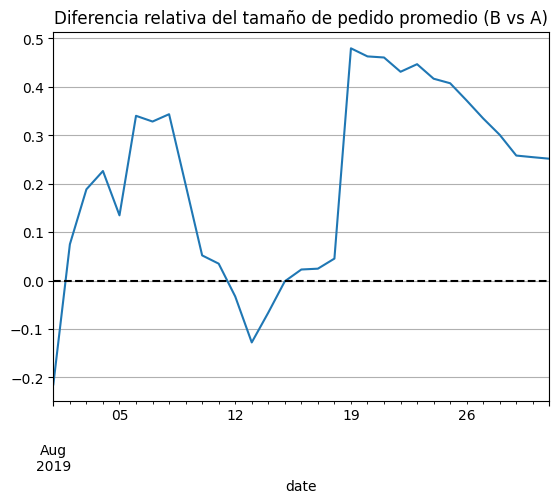

In [11]:
# Creamos una tabla dinámica para simplificar la información de B respecto a A
pivot = cumulative_avg_order.pivot(index='date', columns='group', values='avg_order')
pivot['rel_diff'] = (pivot['B'] - pivot['A']) / pivot['A']

#Graficamos
pivot['rel_diff'].plot(title='Diferencia relativa del tamaño de pedido promedio (B vs A)')
plt.axhline(y=0, color='black', linestyle='--')
plt.grid(True)
plt.show()

#### Referente a la diferencia relativa entre B y A, se presentan las siguientes observaciones:
La diferencia relativa entre grupos cambia rápidamente al inicio, subiendo y bajando de forma abrupta, debiéndose esto a que en los primeros días, el número de pedidos es bajo, por lo que cualquier variación tiene un gran impacto porcentual.

Durante algunos días, el grupo B tuvo un tamaño de pedido promedio menor que el grupo A, esto indica que no hubo una ventaja consistente de B sobre A.

A mediados de agosto, la diferencia relativa se vuelve positiva y sostenida, esto coincide con el comportamiento observado en los gráficos anteriores.

### 4. Tasa de conversión diaria por grupo

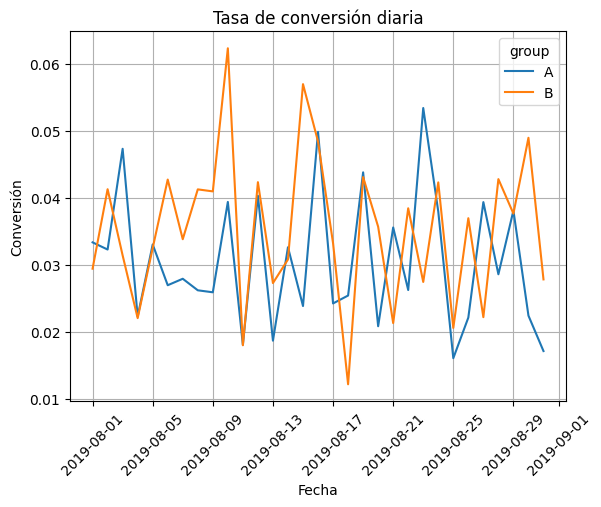

In [12]:
#Calculamos los pedidos diarios
orders_daily = orders.groupby(['date', 'group'])['transactionId'].nunique().reset_index(name='orders')

#Unimos los DF de visitas y pedidos diarios
merged = pd.merge(visits, orders_daily, how='left', on=['date', 'group']).fillna(0)

#Calculamos la tasa de conversión
merged['conversion'] = merged['orders'] / merged['visits']

#Graficamos
sns.lineplot(data=merged, x='date', y='conversion', hue='group')
plt.title('Tasa de conversión diaria')
plt.ylabel('Conversión')
plt.xlabel('Fecha')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<div class="alert alert-block alert-success">
<b>Celda [12]</b> <a class="tocSkip"></a><br>
La integración de datos de visitas y pedidos diarios para calcular la tasa de conversión es un enfoque sólido que permite un análisis detallado del comportamiento del usuario.
</div>


#### Referente a la tasa de conversión, se presentan las siguientes observaciones:
1. Las tasas de conversión fluctúan bastante de un día a otro, lo que indica que el comportamiento del usuario no es completamente estable.

2. A lo largo del periodo, no se observa una diferencia persistente a favor de un grupo en específico.

Se recomienda realizar un gráfico más diciente como lo es el de dispersión, el cual se realizará en el siguiente paso.

### 5. Gráfico de dispersión (# pedidos)

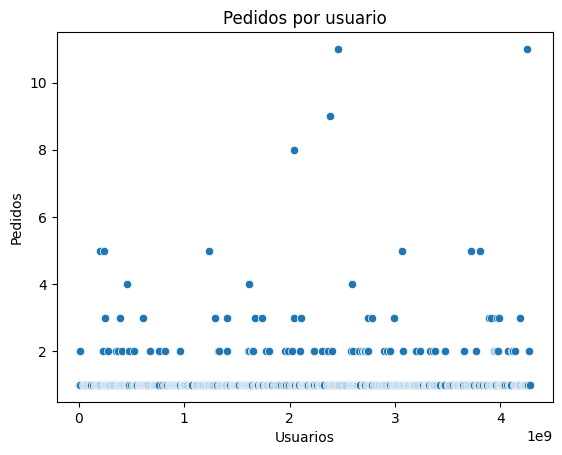

In [13]:
#Calculamos los pedidos por usuario
orders_per_user = orders.groupby('visitorId')['transactionId'].nunique().reset_index(name='orders')

#Graficamos 
sns.scatterplot(data=orders_per_user, x='visitorId', y='orders')
plt.title('Pedidos por usuario')
plt.ylabel('Pedidos')
plt.xlabel('Usuarios')
plt.show()

#### Referente al gráfico (# pedidos), se presentan las siguientes observaciones:
1. La mayoría de los usuarios hizo solo 1 o 2 pedidos.
2. Solo un grupo muy pequeño realizó más de 5 pedidos, incluso algunos llegan a 12 pedidos, lo que es atípico y puede distorsionar estadísticas como el promedio y la conversión.
3. Para obtener métricas más representativas del comportamiento típico del usuario, conviene filtrar estos valores extremos, ya que si estos usuarios están concentrados en uno de los grupos (A o B), podrían sesgar los resultados del experimento.


### 6. Calculo de percentiles (95,99) para el # de pedidos

In [14]:
#Determinamos los percentiles solicitados
percentiles_orders = np.percentile(orders_per_user['orders'], [95, 99])
print('Percentiles (pedidos por usuario):', percentiles_orders)

Percentiles (pedidos por usuario): [2. 4.]


#### Respecto a los resultados que arrojan los percentiles analizados, podemos presentar las siguientes observaciones:

Esto quiere decir que:

* El 95% de los usuarios hizo 2 pedidos o menos
* El 99% de los usuarios hizo 4 pedidos o menos.

Esto confirma que el comportamiento habitual es comprar una o dos veces durante el periodo analizado y que los outliers aunque son una minoría (menos del 1%), podrían tener un impacto desproporcionado en métricas agregadas como la tasa de conversión y el ingreso promedio por usuario.

### 7. Gráfico de dispersión ($ pedidos)

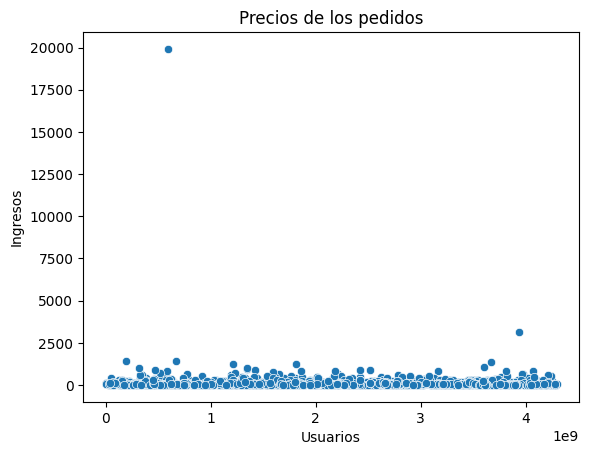

In [15]:
#Graficamos con la información ya obtenida en pasos anteriores
sns.scatterplot(data=orders, x='transactionId', y='revenue')
plt.title('Precios de los pedidos')
plt.ylabel('Ingresos')
plt.xlabel('Usuarios')
plt.show()

#### Referente al gráfico ($ pedidos), se presentan las siguientes observaciones:

1. La mayoría de los pedidos se concentran en rangos bajos de ingreso (aparentemente entre 50 y 500).
2. Hay pedidos con ingresos por encima de 2.000, e incluso uno cercano a 20.000, lo cual no es representativo del comportamiento general.

Al igual que con el diagrama de dispersión para el # de pedidos, se recomienda aplicar filtros para eliminar los valores extremos del revenue para evitar distorsionar el cálculo más adelante.


### 8. Calculo de percentiles (95,99) para el $ de pedidos

In [16]:
#Determinamos los percentiles solicitados
percentiles_revenue = np.percentile(orders['revenue'], [95, 99])
print('Percentiles (precio del pedido):', percentiles_revenue)

Percentiles (precio del pedido): [435.54  900.904]


#### Referente a los resultados que arrojan los percentiles analizados, se presentan las siguientes observaciones:

Al calcular los percentiles 9 y 99 del precio de los pedidos, identificamos los siguientes percentiles:

* El percentil 95 marca el punto por debajo del cual se encuentran el 95% de los pedidos más bajos.
* El percentil 99 marca el umbral por debajo del cual se encuentran el 99 de los pedidos.

Por lo tanto, cualquier pedido cuyo precio esté por encima del percentil 95 puede considerarse una anomalía potencial para análisis conservador, y por encima del 99 para el análisis más estricto.

### 9. Significancia estadística (De la diferencia en la conversión entre los grupos utilizando los datos en bruto)

In [17]:
from statsmodels.stats.proportion import proportions_ztest

grouped_orders = orders.groupby('group')['visitorId'].nunique()
grouped_visits = visits.groupby('group')['visits'].sum()

zstat, pval = proportions_ztest(count=grouped_orders, nobs=grouped_visits)
print(f"z = {zstat:.3f}, p = {pval:.3f}")

z = -2.392, p = 0.017


<div class="alert alert-block alert-warning">
<b>Celda [17]</b> <a class="tocSkip"></a><br>
El uso de la prueba z para proporciones es adecuado para comparar tasas de conversión. Sin embargo, asegúrate de verificar los supuestos de normalidad y tamaño de muestra para garantizar la validez de los resultados. Esto es crucial para obtener conclusiones precisas.
</div>


#### Referente a la significancia estadística arrojada, se presentan las siguientes observaciones:

El valor p (0.017) es menor al valor alpha por defecto (0.05), lo que significa que la diferencia observada en las tasas de conversión entre los grupos es estadísticamente siginificativa. 

Por otro lado, el valor Z al ser negativo, indica que el grupo B tuvo menor tasa de conversión que el grupo A, lo cual confirma que los valores atípicos pudieron estar sesgando el resultado y que el cambio introductorio en el grupo B puede no tener un efecto positivo en la conversión.

### 10. Significancia estadística (De la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto)

In [18]:
from scipy.stats import mannwhitneyu

group_a = orders[orders['group'] == 'A']['revenue']
group_b = orders[orders['group'] == 'B']['revenue']

u_stat, pval = mannwhitneyu(group_a, group_b)
print(f"U = {u_stat}, p = {pval}")

U = 175872.5, p = 0.6915246773264736


<div class="alert alert-block alert-success">
<b>Celda [18]</b> <a class="tocSkip"></a><br>
La elección de la prueba de Mann-Whitney U para comparar ingresos entre grupos es adecuada, especialmente cuando los datos no siguen una distribución normal. Buen trabajo.
</div>


#### Referente la significancia estaística del tamaño promedio, se presentan las siguientes observaciones: 

El valor p=0.6915 es mucho mayor que el valor alpha por defecto, esto indica que no hay evidencia estadísticamente significativa de que los tamaños promedio de los pedidos difieran entre los grupos A y B en los datos sin filtrar.

### 11. Significancia estadística en conversión (datos filtrados)

In [19]:
# Límite de ingresos por pedido (percentil 95)
revenue_95 = orders['revenue'].quantile(0.95)

# Usuarios con muchos pedidos (percentil 95 de órdenes por usuario)
orders_per_user = orders.groupby('visitorId')['transactionId'].count()
user_order_limit = orders_per_user.quantile(0.95)

# Obtener IDs de usuarios que superan el límite de pedidos
frequent_users = orders_per_user[orders_per_user > user_order_limit].index

# Filtrar pedidos atípicos por revenue y por usuario
orders_filtered = orders[(orders['revenue'] <= revenue_95) &
    (~orders['visitorId'].isin(frequent_users))]

# Recalculamos conversiones con datos filtrados
filtered_orders_per_group = orders_filtered.groupby('group')['visitorId'].nunique()
visits_per_group = visits.groupby('group')['visits'].sum()

z_stat, pval = proportions_ztest(count=filtered_orders_per_group, nobs=visits_per_group)
print(f"Z = {z_stat:.3f}, p = {pval:.3f}")

Z = -2.466, p = 0.014


<div class="alert alert-block alert-warning">
<b>Celda [19]</b> <a class="tocSkip"></a><br>
Al filtrar datos atípicos, asegúrate de documentar claramente el criterio utilizado para definir dichos valores. Esto mejorará la transparencia y reproducibilidad de tu análisis, permitiendo a otros entender tus decisiones.
</div>


#### Referente a la significancia estadística de la conversión con los datos filtrados, se presentan las siguientes observaciones: 
* El valor p=0.014 es menor que 0.05, lo que indica que la diferencia en las tasas de conversión entre los grupos A y B es estadísticamente significativa despues de eliminar usuarios con comportamientos atípico, esto sugiere que el cambio introducido en el grupo B tuvo un efecto real sobre la probabilidad de conversión.

* El resultado implica que la conversión fue significativamente más baja en el grupo B comparado con el grupo A, lo cual es importante al evaluar el impacto del experimento.

### 12. Significancia estadística en tamaño promedio (datos filtrados)

In [20]:
group_a_f = orders_filtered[orders_filtered['group'] == 'A']['revenue']
group_b_f = orders_filtered[orders_filtered['group'] == 'B']['revenue']

u_stat, pval = mannwhitneyu(group_a_f, group_b_f)
print(f"U = {u_stat}, p = {pval}")

U = 128461.5, p = 0.7295766132829709


#### Referente a la significancia estadística en el tamaño promedio con los datos filtrados, se presetan las siguientes observaciones: 

* El valor p(0.73) es muy superior al valor alpha por defecto, lo que significa que no hay evidencia suficiente para afirmar que el tamaño de los pedidos difiere entre ambos grupos una vez filtrados los valores extremos.
* Aunque el grupo B tuvo una conversión significativamente menor en los puntos analizados anteriormente, el mtamaño promedio no es más alto que el de A.

### 13. Toma de desiciones

Con base en todo el análisis realizado (tanto con datos sin filtrar como filtrados), y teniendo en cuenta las desiciones posibles para este Test A/B, encontramos que:

1. No sevidencia diferencia significativa entre los grupos A y B respecto a la tasa de conversión.

2. No hay diferencia significativa con respecto al tamaño promedio de pedido.

3. Sí se detectó una diferencia significativa una vez se filtraron los datos dando como resultado que el grupo B tuvo una menor conversión que el grupo A..

4. Análisis de outliers: Se identificaron usuarios con múltiples pedidos y valores de ingresos atípicos, lo cual influyó notablemente en los resultados.

Por lo tanto, la decisión recomendada luego de un análisis completo es:

####  Decisión 1: Parar la prueba y considerar al grupo A como líder.

Esto debido a que el grupo B mostró peores resultados en conversión luego de eliminar outliers, y este efecto fue estadísticamente significativo.

Además, no se observó ningún beneficio significativo en el tamaño de pedido promedio que pudiera compensar la caída en la conversión.

Continuar la prueba probablemente no revertirá este patrón, y mantener la versión del grupo B puede incluso dañar ingresos si se implementa.

Dado que los datos filtrados reflejan mejor el comportamiento genuino de los usuarios, es razonable confiar en esa versión del análisis para tomar una decisión.

<div class="alert alert-block alert-success">
<b>Comentario final</b> <a class="tocSkip"></a><br>
¡Muy buen trabajo, Camilia! A lo largo del proyecto mostraste fortalezas muy claras:<br><br>
• Aplicaste exploración inicial con <code>info()</code> y verificaste duplicados, asegurando la integridad de los datos.<br>
• Implementaste factores ICE y RICE para la priorización de hipótesis, lo que demuestra un enfoque estratégico.<br>
• Usaste visualizaciones pertinentes que mejoran la comprensión del comportamiento de los ingresos y conversiones.<br>
• Aplicaste pruebas estadísticas adecuadas para evaluar diferencias entre grupos.<br><br>
¡Felicidades!
</div>
